In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
pd.pandas.set_option('display.max_rows',None)
import seaborn as sns
from sklearn import preprocessing
import mplfinance as mpf

In [2]:
#data = pd.read_csv(r'E:\E_Labs\date.csv')

In [3]:
#new = data['Date'].str.split(" ", expand = True)
#new

In [4]:
#new.to_csv(r'E:\E_Labs\check.csv')

In [5]:
data = pd.read_csv(r'E:\Bio Sensing\PPG_ &h_edit.csv')
data.head()

,Time,Description,BPM,SPO2
0,[2021-11-08 03:27:17.025],Heart rate & SpO2,98.80,93
1,[2021-11-08 03:27:18.025],Heart rate & SpO2,97.86,93
2,[2021-11-08 03:27:20.963],Heart rate & SpO2,93.02,94
3,[2021-11-08 03:27:21.964],Heart rate & SpO2,72.94,94
4,[2021-11-08 03:27:22.965],Heart rate & SpO2,123.37,94


In [6]:
data.columns = ['Time','Description','BPM','SPO2']
data.head()

,Time,Description,BPM,SPO2
0,[2021-11-08 03:27:17.025],Heart rate & SpO2,98.80,93
1,[2021-11-08 03:27:18.025],Heart rate & SpO2,97.86,93
2,[2021-11-08 03:27:20.963],Heart rate & SpO2,93.02,94
3,[2021-11-08 03:27:21.964],Heart rate & SpO2,72.94,94
4,[2021-11-08 03:27:22.965],Heart rate & SpO2,123.37,94


In [7]:
data.drop('Description',axis=1,inplace=True)
data.head()

,Time,BPM,SPO2
0,[2021-11-08 03:27:17.025],98.80,93
1,[2021-11-08 03:27:18.025],97.86,93
2,[2021-11-08 03:27:20.963],93.02,94
3,[2021-11-08 03:27:21.964],72.94,94
4,[2021-11-08 03:27:22.965],123.37,94


In [8]:
import re
def clean_time(text):
    # 1. Make a space
    review = re.sub('[^a-zA-Z0-9-.:]',' ', text)
    return (review)

data['Time'] = data['Time'].apply(lambda x: clean_time(x))
data.head()

,Time,BPM,SPO2
0,2021-11-08 03:27:17.025,98.80,93
1,2021-11-08 03:27:18.025,97.86,93
2,2021-11-08 03:27:20.963,93.02,94
3,2021-11-08 03:27:21.964,72.94,94
4,2021-11-08 03:27:22.965,123.37,94


In [9]:
data_copy = data.copy()

In [10]:
data['Time'] = pd.to_datetime(data['Time'])
data['Minute'] = data['Time'].dt.minute
data['Hour'] = data['Time'].dt.hour
data['Second'] = data['Time'].dt.second
data.head(10)

,Time,BPM,SPO2,Minute,Hour,Second
0,2021-11-08 03:27:17.025,98.80,93,27,3,17
1,2021-11-08 03:27:18.025,97.86,93,27,3,18
2,2021-11-08 03:27:20.963,93.02,94,27,3,20
3,2021-11-08 03:27:21.964,72.94,94,27,3,21
4,2021-11-08 03:27:22.965,123.37,94,27,3,22
5,2021-11-08 03:27:23.966,168.67,94,27,3,23
6,2021-11-08 03:27:24.966,105.15,94,27,3,24
7,2021-11-08 03:27:25.968,97.33,94,27,3,25
8,2021-11-08 03:27:26.969,94.55,33,27,3,26
9,2021-11-08 03:27:27.969,94.34,33,27,3,27


In [11]:
data.shape

(3704, 6)

In [12]:
data['SPO2'] = data['SPO2'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    3704 non-null   datetime64[ns]
 1   BPM     3704 non-null   float64       
 2   SPO2    3704 non-null   float64       
 3   Minute  3704 non-null   int64         
 4   Hour    3704 non-null   int64         
 5   Second  3704 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 173.8 KB


Text(0, 0.5, '<----------------Heart Beat---------------->')

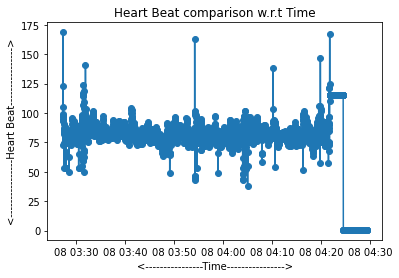

In [13]:
plt.plot_date(data['Time'], data['BPM'], linestyle='solid')
plt.title('Heart Beat comparison w.r.t Time')
plt.xlabel('<----------------Time---------------->')
plt.ylabel('<----------------Heart Beat---------------->')

Text(0, 0.5, '<----------------Heart Beat---------------->')

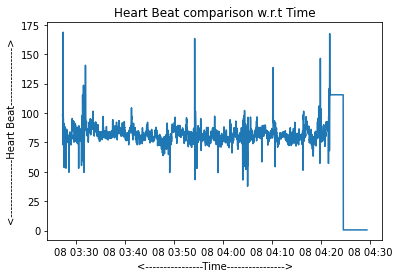

In [14]:
plt.plot_date(data['Time'], data['BPM'], linestyle='solid', marker='')
plt.title('Heart Beat comparison w.r.t Time')
plt.xlabel('<----------------Time---------------->')
plt.ylabel('<----------------Heart Beat---------------->')

Text(0, 0.5, '<----------------SPO2---------------->')

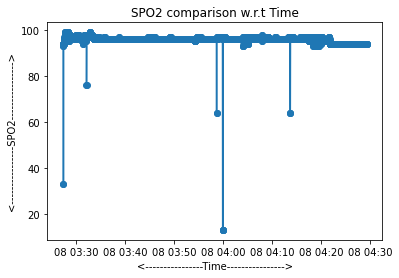

In [15]:
plt.plot_date(data['Time'], data['SPO2'], linestyle='solid')
plt.title('SPO2 comparison w.r.t Time')
plt.xlabel('<----------------Time---------------->')
plt.ylabel('<----------------SPO2---------------->')

Text(0, 0.5, '<----------------SPO2---------------->')

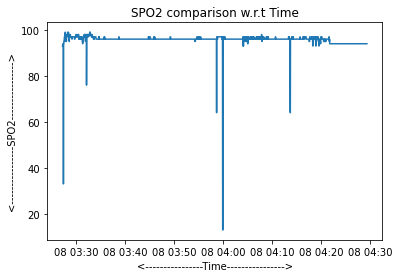

In [16]:
plt.plot_date(data['Time'], data['SPO2'], linestyle='solid', marker = '')
plt.title('SPO2 comparison w.r.t Time')
plt.xlabel('<----------------Time---------------->')
plt.ylabel('<----------------SPO2---------------->')

In [17]:
data

,Time,BPM,SPO2,Minute,Hour,Second
0,2021-11-08 03:27:17.025,98.80,93.0,27,3,17
1,2021-11-08 03:27:18.025,97.86,93.0,27,3,18
2,2021-11-08 03:27:20.963,93.02,94.0,27,3,20
3,2021-11-08 03:27:21.964,72.94,94.0,27,3,21
4,2021-11-08 03:27:22.965,123.37,94.0,27,3,22
5,2021-11-08 03:27:23.966,168.67,94.0,27,3,23
6,2021-11-08 03:27:24.966,105.15,94.0,27,3,24
7,2021-11-08 03:27:25.968,97.33,94.0,27,3,25
8,2021-11-08 03:27:26.969,94.55,33.0,27,3,26
9,2021-11-08 03:27:27.969,94.34,33.0,27,3,27


In [18]:
data_length = len(data['Minute'])-1

In [19]:
#New Time

i=0
time = []

while(i<data_length):
    a=data['Minute'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['Minute'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    time.append(data_copy['Time'][j-1])
    i=i+count

In [20]:
#New Hour

i=0
hour = []

while(i<data_length):
    a=data['Minute'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['Minute'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    hour.append(data['Hour'][j-1])
    i=i+count

In [21]:
#New Minute

i=0
minute = []

while(i<data_length):
    a=data['Minute'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['Minute'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    minute.append(data['Minute'][j-1])
    i=i+count

In [22]:
#New Second

i=0
second = []

while(i<data_length):
    a=data['Minute'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['Minute'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    second.append(data['Second'][j-1])
    i=i+count

In [23]:
print(len(time))
print(len(hour))
print(len(minute))
print(len(second))

63
63
63
63


In [24]:
#Mean BPM & SPO2

def mean(data,feature):
    i=0
    spo2_mean=[]
    while(i<data_length):
        a=data['Minute'][i]
        j=i
        count = 0
        s = 0
        mean = 0
        while(j<data_length):
            if(a == data['Minute'][j]):
                s = data[feature][j] + s
                count = count + 1
                #spo2_mean = (s/count).astype(int)
                #spo2_mean.append(s/count)
                j=j+1
            else:
                break
                
        mean = round(s/count,2)
        spo2_mean.append(mean)
        i=i+count
    return(spo2_mean)
#spo2_mean

In [25]:
data_new = pd.DataFrame()

data_new =pd.DataFrame({'Time' : time,
                        'Hour' : hour,
                        'Minute' : minute,
                        'Second' : second })
data_new.head()

,Time,Hour,Minute,Second
0,2021-11-08 03:27:59.000,3,27,59
1,2021-11-08 03:28:59.060,3,28,59
2,2021-11-08 03:29:59.119,3,29,59
3,2021-11-08 03:30:59.178,3,30,59
4,2021-11-08 03:31:59.237,3,31,59


In [26]:
for feature in ['BPM','SPO2']:
    xy = mean(data,feature)
    mn = pd.DataFrame(xy)
    data_new = pd.concat([data_new,mn],axis=1)
    
    
data_new.columns = ['Time','Hour','Minute','Second','BPM_mean','SPO2_mean']
data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean
0,2021-11-08 03:27:59.000,3,27,59,87.26,92.68
1,2021-11-08 03:28:59.060,3,28,59,78.05,97.32
2,2021-11-08 03:29:59.119,3,29,59,84.05,96.83
3,2021-11-08 03:30:59.178,3,30,59,80.54,97.05
4,2021-11-08 03:31:59.237,3,31,59,87.46,96.55


In [27]:
data_new.loc[(data_new['BPM_mean'] == 0.00), 'Condition'] = 'Dead' 

data_new.loc[((data_new['BPM_mean'] < 60)|(data_new['BPM_mean'] > 100)) | 
             ((data_new['SPO2_mean'] < 94)|(data_new['SPO2_mean'] > 100)), 'Condition'] = 'Critical'

data_new.loc[((data_new['BPM_mean'] >= 60)&(data_new['BPM_mean'] <= 100)) & 
             ((data_new['SPO2_mean'] >= 94)&(data_new['SPO2_mean'] <= 99)), 'Condition'] = 'Normal' 

data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean,Condition
0,2021-11-08 03:27:59.000,3,27,59,87.26,92.68,Critical
1,2021-11-08 03:28:59.060,3,28,59,78.05,97.32,Normal
2,2021-11-08 03:29:59.119,3,29,59,84.05,96.83,Normal
3,2021-11-08 03:30:59.178,3,30,59,80.54,97.05,Normal
4,2021-11-08 03:31:59.237,3,31,59,87.46,96.55,Normal


In [28]:
#data_new.to_csv(r'E:\Bio Sensing\PPG_work.csv')

In [29]:
data_new = pd.read_csv(r'E:\Bio Sensing\PPG_work.csv')
data_new.drop('Unnamed: 0',axis=1,inplace=True)

data_new['Time'] = pd.to_datetime(data_new['Time'])

Text(0.5, 1.0, 'Count of number of Target Feature')

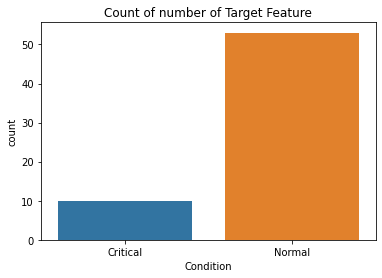

In [30]:
sns.countplot(x = data_new['Condition'])
plt.title('Count of number of Target Feature')

Text(0.5, 1.0, 'Percentge share of Target Feature')

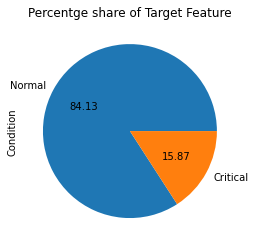

In [31]:
data_new['Condition'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Percentge share of Target Feature')

<AxesSubplot:xlabel='Time', ylabel='BPM_mean'>

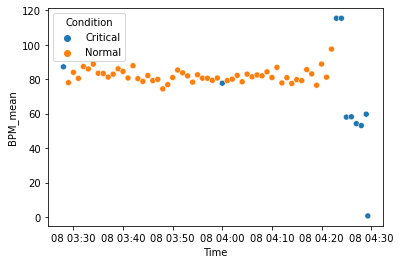

In [32]:
sns.scatterplot(x = data_new['Time'], y = data_new['BPM_mean'],hue = data_new['Condition'])

<AxesSubplot:xlabel='Time', ylabel='SPO2_mean'>

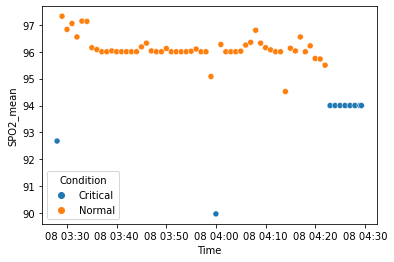

In [33]:
sns.scatterplot(x = data_new['Time'], y = data_new['SPO2_mean'],hue = data_new['Condition'])

In [34]:
le=preprocessing.LabelEncoder()
le.fit(['Critical','Normal'])
y=pd.DataFrame()
data_new['Condition'] = le.transform(data_new['Condition'])

data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean,Condition
0,2021-11-08 03:27:59.000,3,27,59,87.26,92.68,0
1,2021-11-08 03:28:59.060,3,28,59,78.05,97.32,1
2,2021-11-08 03:29:59.119,3,29,59,84.05,96.83,1
3,2021-11-08 03:30:59.178,3,30,59,80.54,97.05,1
4,2021-11-08 03:31:59.237,3,31,59,87.46,96.55,1


<AxesSubplot:>

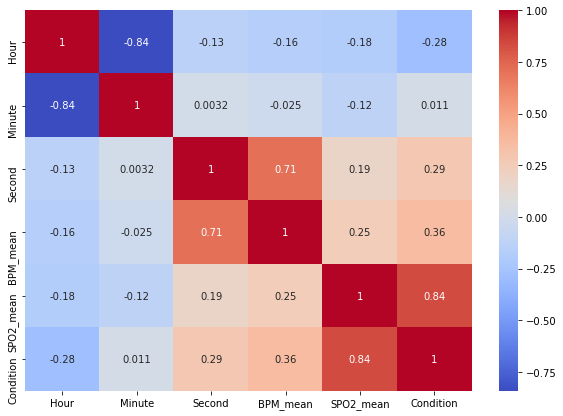

In [35]:
corr = data_new.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       63 non-null     datetime64[ns]
 1   Hour       63 non-null     int64         
 2   Minute     63 non-null     int64         
 3   Second     63 non-null     int64         
 4   BPM_mean   63 non-null     float64       
 5   SPO2_mean  63 non-null     float64       
 6   Condition  63 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 3.3 KB


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
x = data_new[['Hour','Minute','Second','BPM_mean','SPO2_mean']]

y = data_new['Condition']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

print('Tota train rows {}'.format(len(x_train)))
print('Tota test rows {}'.format(len(x_test)))

Tota train rows 50
Tota test rows 13


In [40]:
# Training model using Decision Tree Classifier

def training_model():
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(x_train, y_train)
    return classifier

In [41]:
model = training_model()

In [42]:
#Visualizing the performace of the model
y_pred_train = model.predict(x_train)

#Printing the classification_report
print(classification_report(y_train, y_pred_train,
                            target_names = ['Critical','Normal']))

#Printing the confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_train , y_train)
acc_score = acc_score*100
print('\nAccuracy of test set {}%'.format(acc_score))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         5
      Normal       1.00      1.00      1.00        45

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[ 5  0]
 [ 0 45]]

Accuracy of test set 100.0%


In [43]:
#Visualizing the performace of the model
y_pred_test = model.predict(x_test)

#Printing the classification_report
print(classification_report(y_test, y_pred_test,
                            target_names = ['Critical','Normal']))

#Printing the confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_test , y_test)
acc_score = acc_score*100
print('\nAccuracy of test set {}%'.format(acc_score))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         5
      Normal       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[5 0]
 [0 8]]

Accuracy of test set 100.0%


In [44]:
x.head(0)

,Hour,Minute,Second,BPM_mean,SPO2_mean


In [45]:
def check_data():
    hour = int(input('Enter the current hour : '))
    minute = int(input('Enter the current minute : '))
    second = int(input('Enter the current second : '))
    bpm_mean = float(input('What is your current BPM : '))
    spo2_mean = float(input('What is your current SPO2 : '))
    d = [[hour,minute,second,bpm_mean,spo2_mean]]
    pd.DataFrame(d)
    prediction = model.predict(d)
    normal = 'Your health condition is normal'
    critical = 'Your health condition is critical'
    
    if prediction == 0:
            return critical
    elif prediction == 1:
            return normal

In [46]:
check_data()

Enter the current hour : 09
Enter the current minute : 50
Enter the current second : 25
What is your current BPM : 78
What is your current SPO2 : 98


'Your health condition is normal'

In [47]:
check_data()

Enter the current hour : 10
Enter the current minute : 05
Enter the current second : 43
What is your current BPM : 63
What is your current SPO2 : 94


'Your health condition is critical'